# LAB Sheet-12: Neural Networks

### Submitted by: Vatsalya Gupta, SC19B098, B.Tech. ECE VII Sem

In this LAB sheet, we will be exploring how to use a package called $\texttt{Keras}$ to build our first neural network to predict if house prices are above or below median value. In particular, we will go through the full Deep Learning pipeline, from:

1. Exploring and Processing the Data
2. Building and Training our Neural Network
3. Visualizing Loss and Accuracy
4. Adding Regularization to our Neural Network

### Pre-requisites:
This exercise requires you to have a Jupyter notebook set up with an environment that has the packages $\texttt{keras, tensorflow, pandas, scikit-learn}$ and $\texttt{matplotlib}$ installed.

You need to download the dataset [here](https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view) and put the dataset in the same folder as this notebook and run the code cells below. Note that the results you get might differ slightly from the existing results in this notebook as there is a degree of randomness in the way we split our dataset as well as the initialization of our neural network.

## Exploring and Processing the Data

## ?
Read in the CSV file that you've been given. Use  $\texttt{pandas}$ for that:

In [1]:
# Your code solution here

import pandas as pd

df = pd.read_csv("housepricedata.csv")
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [2]:
dataset = df.values

In [3]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Now, split the dataset into our input features(X) and the label(Y) we wish to predict.

In [4]:
# Your code solution here

X = dataset[:, 0:-1]  # features
y = dataset[:, -1]  # labels

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [5]:
from sklearn import preprocessing

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

## ?
Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. Use the function $\texttt{train_test_split}$ from $\texttt{scikit-learn}$ to do that.
Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function twice.
(Use 30% of the data for testing + validation (15% each) and 70% of the data for training)

In [8]:
# Your code solution here

from sklearn.model_selection import train_test_split

# Train: 70%, Test + Val: 30%
X_train, X_test_plus_val, Y_train, Y_test_plus_val = train_test_split(X_scale, y, test_size = 0.3, random_state = 0)

# Train: 70%, Test: 15%, Val: 15%
X_val, X_test, Y_val, Y_test = train_test_split(X_test_plus_val, Y_test_plus_val, test_size = 0.5, random_state = 0)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Building and Training Our First Neural Network

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:

<div>
<img src="Screenshot_2022-11-20_20214025.png" width="500"/>
</div>

In words, we want to have these layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.
Let's import the code from Keras that we will need to use:

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [10]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [11]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [12]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.7288 - accuracy: 0.5029 - val_loss: 0.7226 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.4481 - val_loss: 0.7087 - val_accuracy: 0.4018
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.3239 - val_loss: 0.6986 - val_accuracy: 0.3425
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.4295 - val_loss: 0.6906 - val_accuracy: 0.5251
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.4951 - val_loss: 0.6838 - val_accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5068 - val_loss: 0.6779 - val_accuracy: 0.5205
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.5108 - val_loss: 0.6727 - val_accuracy: 0.5434
Epoch 8/100


Evaluating our data on the test set:

In [13]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.9087


0.9086757898330688

## Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

We want to visualize the training loss and the validation loss like this:

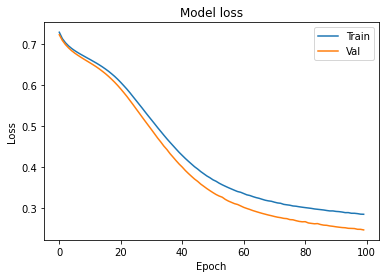

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend(['Train', 'Val'], loc='upper right')

## ?
Also visualize the training accuracy and the validation accuracy:

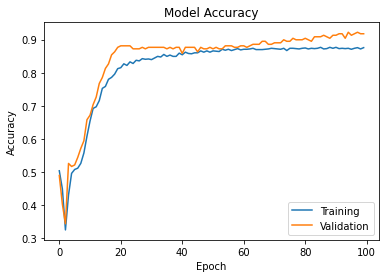

In [16]:
# Your code solution here

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")

plt.legend(["Training", "Validation"], loc = "lower right")

## Adding Regularization to our Neural Network

## ?
We'll train a model which will overfit, which we call Model 2. Create the model with 3 hidden layers of 1000 neurons with 'relu' activation. Complile the model using the same criteria and fit the model on the training data as before. This might take a few minutes.

In [17]:
# Your code solution here

Model2 = Sequential([
    Dense(1000, activation = "relu", input_shape = (10,)),  # input layer
    Dense(1000, activation = "relu"),  # hidden layer 1
    Dense(1000, activation = "relu"),  # hidden layer 2
    Dense(1000, activation = "relu"),  # hidden layer 3
    Dense(1, activation = "sigmoid"),  # output layer
])

Model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
              
Hist2 = Model2.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.4674 - accuracy: 0.7798 - val_loss: 0.3753 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3464 - accuracy: 0.8503 - val_loss: 0.2789 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.8601 - val_loss: 0.3035 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.8640 - val_loss: 0.2986 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.8767 - val_loss: 0.2478 - val_accuracy: 0.9269
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.8816 - val_loss: 0.2706 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2691 - accuracy: 0.8816 - val_loss: 0.2593 - val_accuracy: 0.8767
Epoch 8/100


Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

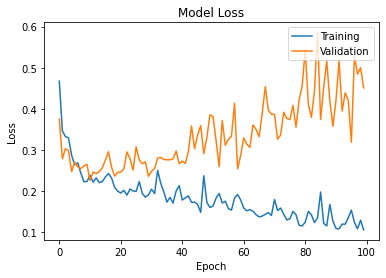

In [18]:
# Your code solution

plt.plot(Hist2.history["loss"])
plt.plot(Hist2.history["val_loss"])

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")

plt.legend(["Training", "Validation"], loc = "upper right")

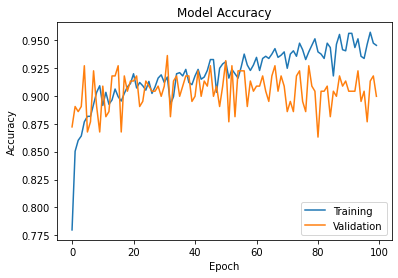

In [19]:
# Your code solution

plt.plot(Hist2.history["accuracy"])
plt.plot(Hist2.history["val_accuracy"])

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")

plt.legend(["Training", "Validation"], loc = "lower right")

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [21]:
Model3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

## ?
Complile the model using the same criteria and fit the model on the training data as before.

In [22]:
# Your code solution here

Model3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
              
Hist3 = Model3.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 14.2453 - accuracy: 0.6223 - val_loss: 3.8775 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 1.6942 - accuracy: 0.8317 - val_loss: 0.6598 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5870 - accuracy: 0.8523 - val_loss: 0.5114 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5233 - accuracy: 0.8552 - val_loss: 0.4646 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5214 - accuracy: 0.8523 - val_loss: 0.4583 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5132 - accuracy: 0.8650 - val_loss: 0.4659 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4880 - accuracy: 0.8640 - val_loss: 0.4250 - val_accuracy: 0.9041
Epoch 8/100

## ?
Now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, add an additional line of code (plt.ylim) when plotting.

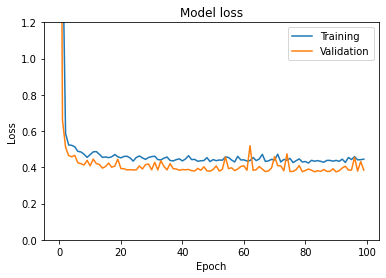

In [23]:
# Your code solution here

plt.plot(Hist3.history["loss"])
plt.plot(Hist3.history["val_loss"])

plt.ylim(top = 1.2, bottom = 0)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model loss")

plt.legend(["Training", "Validation"], loc = "upper right")

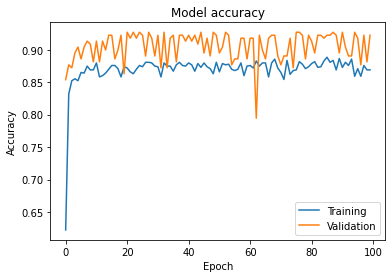

In [24]:
# Your code solution here

plt.plot(Hist3.history["accuracy"])
plt.plot(Hist3.history["val_accuracy"])

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy")

plt.legend(["Training", "Validation"], loc = "lower right")

As compared to Model 2, you should see that there's less overfitting!